In [57]:
#Dependencies
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from scipy import stats
import pandas as pd
import numpy as np
from api_keys import api_key
import json

In [58]:
# !pip install sodapy

In [59]:
from sodapy import Socrata

client = Socrata("datacatalog.cookcountyil.gov", "a5adtglEZdwTXbUuRvAvPXv59")

In [60]:
# zip_df = clean_zipcode_response(results)
# zip_df.head(10)

In [61]:
#List of zipcodes we want to look at

zipcodes = [60618, 60647, 60625, 60608, 60624, 60614]


In [62]:
#Declare function

def clean_zipcode_response(api_response):
    df = pd.DataFrame(api_response)
    df["year"] = df["year"].astype('int')
    df_limited_cols = df[["prop_address_zipcode_1", "pin", "year"]]
    return df_limited_cols

In [64]:
final_zip = pd.DataFrame(columns = ["prop_address_zipcode_1", "pin", "year"])

for zipcode in zipcodes:
    universe_response = .geclientt("tx2p-k2g9",prop_address_zipcode_1={zipcode}, where="year > 2015", limit=20000) #50,000
    df_zip = clean_zipcode_response(universe_response)
    final_zip = final_zip.append(df_zip)
final_zip.head(10)
# final_zip.to_csv("final_zip.csv", encoding='utf-8', index=False)

,prop_address_zipcode_1,pin,year
0,60618,13232020401002,2020
1,60618,14183000410000,2020
2,60618,14301190551001,2021
3,60618,14193110260000,2022
4,60618,13241190400000,2017
5,60618,13261300210000,2017
6,60618,14193290571023,2017
7,60618,14191150230000,2020
8,60618,13133130290000,2017
9,60618,14183150360000,2017


In [70]:
def clean_pin_response(api_response):
    df = pd.DataFrame(api_response)
    if "year" not in df:
        return pd.DataFrame(columns = ["pin", "year", "board_tot"])
    df["year"] = df["year"].astype('int')
    if "board_tot" not in df:
        return pd.DataFrame(columns = ["pin", "year", "board_tot"])
    df_limited_cols = df[["pin", "year", "board_tot"]]
    df_limited_cols = df_limited_cols.dropna()
    df_final = df_limited_cols[df_limited_cols["year"] > 2015]
    return df_final

In [96]:
pins = final_zip.pin.unique()

#board_tot is total assessed value 

# final_pin = pd.DataFrame(columns = ["pin", "year", "board_tot"])

for pin in remaining_pins:
    historic_url = f"https://datacatalog.cookcountyil.gov/resource/uzyt-m557.json?pin={pin}"
    historic_response = requests.get(historic_url).json()
    columns = ["pin", "year", "board_tot"]
    final_pin = final_pin.reindex(columns=columns)
    df_pin = clean_pin_response(historic_response)
    final_pin = final_pin.append(df_pin)
final_pin.head(10)

,pin,year,board_tot
12,13232020401002,2016,33472
13,13232020401002,2017,33472
14,13232020401002,2018,33899
15,13232020401002,2019,33899
16,13232020401002,2020,31000
17,14183000410000,2016,31018
18,14183000410000,2017,31018
19,14183000410000,2018,33100
20,14183000410000,2019,33100
21,14183000410000,2020,27239


In [97]:
merged_df = pd.merge(final_zip, final_pin, on=["pin", "year"])
merged_df.head(10)

,prop_address_zipcode_1,pin,year,board_tot
0,60618,13232020401002,2020,31000
1,60618,14183000410000,2020,27239
2,60618,13241190400000,2017,59315
3,60618,13261300210000,2017,27274
4,60618,14193290571023,2017,3655
5,60618,14191150230000,2020,78990
6,60618,13133130290000,2017,48529
7,60618,14183150360000,2017,99909
8,60618,14191180330000,2020,59703
9,60618,14191220380000,2020,76074


In [98]:
modified_df = merged_df
modified_df['board_tot_num'] = modified_df['board_tot'].astype('int')
mean_zip = modified_df.groupby(['prop_address_zipcode_1', 'year'])['board_tot_num'].mean()
mean_zip.head(30)

prop_address_zipcode_1  year
60608                   2016    25235.443032
                        2017    26660.130075
                        2018    26613.571975
                        2019    34934.836695
                        2020    31044.603919
                        2021     9038.000000
60614                   2016    58158.537581
                        2017    56926.231730
                        2018    63329.586314
                        2019    67577.064419
                        2020    66467.909799
60618                   2016    37792.898153
                        2017    38214.435154
                        2018    42071.998525
                        2019    50137.198347
                        2020    45226.915064
60624                   2016    14529.363871
                        2017    15217.096215
                        2018    14262.767271
                        2019    16215.984305
                        2020    14288.940489
60625                   20

In [99]:
print(final_zip['pin'].nunique())
print(final_pin['pin'].nunique())
remaining_pins = list(set(final_zip.pin) - set(final_pin.pin))
print(len(remaining_pins))

75133
74942
191


In [100]:
final_zip.to_csv("final_zip.csv", encoding='utf-8', index=False)
final_pin.to_csv("final_pin.csv", encoding='utf-8', index=False)
merged_df.to_csv("merged_df.csv", encoding='utf-8', index=False)

In [144]:
df_60618 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60618"]
df_60647 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60647"]
df_60625 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60625"]
df_60608 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60608"]
df_60624 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60624"]
df_60614 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60614"]

In [149]:
#60618

df_60618_final = df_60618["board_tot_num"]

df_60618_quartiles = df_60618_final.quantile([.25,.5,.75])
df_60618_low_quartile = df_60618_quartiles[.25]
df_60618_high_quartile = df_60618_quartiles[.75]
df_60618_mean = df_60618_quartiles.mean()
df_60618_iqr = df_60618_high_quartile-df_60618_low_quartile
df_60618_lower_bound = df_60618_low_quartile - (1.5*df_60618_iqr)
df_60618_upper_bound = df_60618_high_quartile + (1.5*df_60618_iqr)
df_60618_outliers = df_60618_quartiles.loc[(df_60618_quartiles < df_60618_lower_bound) & (df_60618_quartiles > df_60618_upper_bound)]

print(f"60618 Low Quartile: {df_60618_low_quartile}")
print(f"60618 Mean: {df_60618_mean}")
print(f"60618 High Quartile: {df_60618_high_quartile}")
print(f"60618 Outliers: Below {df_60618_lower_bound} And Above {df_60618_upper_bound}")



60618 Low Quartile: 23772.25
60618 Mean: 35297.416666666664
60618 High Quartile: 48339.0
60618 Outliers: Below -13077.875 And Above 85189.125


In [150]:
#60647

df_60647_final = df_60647["board_tot_num"]

df_60647_quartiles = df_60647_final.quantile([.25,.5,.75])
df_60647_low_quartile = df_60647_quartiles[.25]
df_60647_high_quartile = df_60647_quartiles[.75]
df_60647_mean = df_60647_quartiles.mean()
df_60647_iqr = df_60618_high_quartile-df_60647_low_quartile
df_60647_lower_bound = df_60647_low_quartile - (1.5*df_60647_iqr)
df_60647_upper_bound = df_60647_high_quartile + (1.5*df_60647_iqr)
df_60647_outliers = df_60647_quartiles.loc[(df_60618_quartiles < df_60647_lower_bound) & (df_60647_quartiles > df_60647_upper_bound)]

print(f"60647 Low Quartile: {df_60647_low_quartile}")
print(f"60647 Mean: {df_60647_mean}")
print(f"60647 High Quartile: {df_60647_high_quartile}")
print(f"60647 Outliers: Below {df_60647_lower_bound} And Above {df_60647_upper_bound}")


60647 Low Quartile: 20276.25
60647 Mean: 33381.916666666664
60647 High Quartile: 47562.5
60647 Outliers: Below -21817.875 And Above 89656.625


In [151]:
#60625

df_60625_final = df_60625["board_tot_num"]

df_60625_quartiles = df_60625_final.quantile([.25,.5,.75])
df_60625_low_quartile = df_60625_quartiles[.25]
df_60625_high_quartile = df_60625_quartiles[.75]
df_60625_mean = df_60625_quartiles.mean()
df_60625_iqr = df_60625_high_quartile-df_60625_low_quartile
df_60625_lower_bound = df_60625_low_quartile - (1.5*df_60625_iqr)
df_60625_upper_bound = df_60625_high_quartile + (1.5*df_60625_iqr)
df_60625_outliers = df_60625_quartiles.loc[(df_60625_quartiles < df_60625_lower_bound) & (df_60625_quartiles > df_60625_upper_bound)]

print(f"60625 Low Quartile: {df_60625_low_quartile}")
print(f"60625 Mean: {df_60625_mean}")
print(f"60625 High Quartile: {df_60625_high_quartile}")
print(f"60625 Outliers: Below {df_60625_lower_bound} And Above {df_60625_upper_bound}")


60625 Low Quartile: 15038.25
60625 Mean: 30393.5
60625 High Quartile: 46058.25
60625 Outliers: Below -31491.75 And Above 92588.25


In [155]:
#60608

df_60608_final = df_60608["board_tot_num"]

df_60608_quartiles = df_60608_final.quantile([.25,.5,.75])
df_60608_low_quartile = df_60608_quartiles[.25]
df_60608_high_quartile = df_60608_quartiles[.75]
df_60608_mean = df_60608_quartiles.mean()
df_60608_iqr = df_60608_high_quartile-df_60608_low_quartile
df_60608_lower_bound = df_60608_low_quartile - (1.5*df_60608_iqr)
df_60608_upper_bound = df_60608_high_quartile + (1.5*df_60608_iqr)
df_60608_outliers = df_60608_quartiles.loc[(df_60608_quartiles < df_60608_lower_bound) & (df_60608_quartiles > df_60608_upper_bound)]

print(f"60608 Low Quartile: {df_60608_low_quartile}")
print(f"60608 Mean: {df_60608_mean}")
print(f"60608 High Quartile: {df_60608_high_quartile}")
print(f"60608 Outliers: Below {df_60608_lower_bound} And Above {df_60608_upper_bound}")


60608 Low Quartile: 9986.5
60608 Mean: 20090.5
60608 High Quartile: 29047.0
60608 Outliers: Below -18604.25 And Above 57637.75


In [156]:
#60624

df_60624_final = df_60624["board_tot_num"]

df_60624_quartiles = df_60624_final.quantile([.25,.5,.75])
df_60624_low_quartile = df_60624_quartiles[.25]
df_60624_high_quartile = df_60624_quartiles[.75]
df_60624_mean = df_60624_quartiles.mean()
df_60624_iqr = df_60624_high_quartile-df_60624_low_quartile
df_60624_lower_bound = df_60624_low_quartile - (1.5*df_60624_iqr)
df_60624_upper_bound = df_60624_high_quartile + (1.5*df_60624_iqr)
df_60624_outliers = df_60624_quartiles.loc[(df_60624_quartiles < df_60624_lower_bound) & (df_60624_quartiles > df_60624_upper_bound)]

print(f"60624 Low Quartile: {df_60624_low_quartile}")
print(f"60624 Mean: {df_60624_mean}")
print(f"60624 High Quartile: {df_60624_high_quartile}")
print(f"60624 Outliers: Below {df_60624_lower_bound} And Above {df_60624_upper_bound}")



60624 Low Quartile: 3583.0
60624 Mean: 10780.166666666666
60624 High Quartile: 17500.5
60624 Outliers: Below -17293.25 And Above 38376.75


In [157]:
#60614

df_60614_final = df_60614["board_tot_num"]

df_60614_quartiles = df_60614_final.quantile([.25,.5,.75])
df_60614_low_quartile = df_60614_quartiles[.25]
df_60614_high_quartile = df_60614_quartiles[.75]
df_60614_mean = df_60614_quartiles.mean()
df_60614_iqr = df_60614_high_quartile-df_60614_low_quartile
df_60614_lower_bound = df_60614_low_quartile - (1.5*df_60614_iqr)
df_60614_upper_bound = df_60614_high_quartile + (1.5*df_60614_iqr)
df_60614_outliers = df_60614_quartiles.loc[(df_60614_quartiles < df_60614_lower_bound) & (df_60614_quartiles > df_60614_upper_bound)]

print(f"60614 Low Quartile: {df_60614_low_quartile}")
print(f"60614 Mean: {df_60614_mean}")
print(f"60614 High Quartile: {df_60614_high_quartile}")
print(f"60614 Outliers: Below {df_60614_lower_bound} And Above {df_60614_upper_bound}")




60614 Low Quartile: 17903.5
60614 Mean: 43527.333333333336
60614 High Quartile: 74588.0
60614 Outliers: Below -67123.25 And Above 159614.75


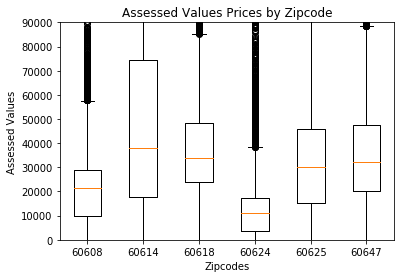

In [173]:
data = [df_60608_final, df_60614_final, df_60618_final, df_60624_final, df_60625_final, df_60647_final]
zipcodes = ["60608", "60614", "60618", "60624", "60625", "60647"]
figl, axl = plt.subplots()
axl.set_title("Assessed Values Prices by Zipcode")
axl.set_ylabel("Assessed Values")
axl.set_xlabel("Zipcodes")
ymin = 0
ymax = 90000
plt.ylim(ymin, ymax)
axl.boxplot(data, labels=zipcodes)
plt.show()

In [ ]:
#Declare function

def clean_zipcode_response(api_response):
    df = pd.DataFrame(api_response)
    df["year"] = df["year"].astype('int')
    df_limited_cols = df[["prop_address_zipcode_1", "pin", "year"]]
    return df_limited_cols

In [64]:
final_zip = pd.DataFrame(columns = ["prop_address_zipcode_1", "pin", "year"])

for zipcode in zipcodes:
    universe_response = .geclientt("tx2p-k2g9",prop_address_zipcode_1={zipcode}, where="year > 2015", limit=20000) #50,000
    df_zip = clean_zipcode_response(universe_response)
    final_zip = final_zip.append(df_zip)
final_zip.head(10)
# final_zip.to_csv("final_zip.csv", encoding='utf-8', index=False)

,prop_address_zipcode_1,pin,year
0,60618,13232020401002,2020
1,60618,14183000410000,2020
2,60618,14301190551001,2021
3,60618,14193110260000,2022
4,60618,13241190400000,2017
5,60618,13261300210000,2017
6,60618,14193290571023,2017
7,60618,14191150230000,2020
8,60618,13133130290000,2017
9,60618,14183150360000,2017


In [70]:
def clean_pin_response(api_response):
    df = pd.DataFrame(api_response)
    if "year" not in df:
        return pd.DataFrame(columns = ["pin", "year", "board_tot"])
    df["year"] = df["year"].astype('int')
    if "board_tot" not in df:
        return pd.DataFrame(columns = ["pin", "year", "board_tot"])
    df_limited_cols = df[["pin", "year", "board_tot"]]
    df_limited_cols = df_limited_cols.dropna()
    df_final = df_limited_cols[df_limited_cols["year"] > 2015]
    return df_final

In [96]:
pins = final_zip.pin.unique()

#board_tot is total assessed value 

# final_pin = pd.DataFrame(columns = ["pin", "year", "board_tot"])

for pin in remaining_pins:
    historic_url = f"https://datacatalog.cookcountyil.gov/resource/uzyt-m557.json?pin={pin}"
    historic_response = requests.get(historic_url).json()
    columns = ["pin", "year", "board_tot"]
    final_pin = final_pin.reindex(columns=columns)
    df_pin = clean_pin_response(historic_response)
    final_pin = final_pin.append(df_pin)
final_pin.head(10)

,pin,year,board_tot
12,13232020401002,2016,33472
13,13232020401002,2017,33472
14,13232020401002,2018,33899
15,13232020401002,2019,33899
16,13232020401002,2020,31000
17,14183000410000,2016,31018
18,14183000410000,2017,31018
19,14183000410000,2018,33100
20,14183000410000,2019,33100
21,14183000410000,2020,27239


In [97]:
merged_df = pd.merge(final_zip, final_pin, on=["pin", "year"])
merged_df.head(10)

,prop_address_zipcode_1,pin,year,board_tot
0,60618,13232020401002,2020,31000
1,60618,14183000410000,2020,27239
2,60618,13241190400000,2017,59315
3,60618,13261300210000,2017,27274
4,60618,14193290571023,2017,3655
5,60618,14191150230000,2020,78990
6,60618,13133130290000,2017,48529
7,60618,14183150360000,2017,99909
8,60618,14191180330000,2020,59703
9,60618,14191220380000,2020,76074


In [98]:
modified_df = merged_df
modified_df['board_tot_num'] = modified_df['board_tot'].astype('int')
mean_zip = modified_df.groupby(['prop_address_zipcode_1', 'year'])['board_tot_num'].mean()
mean_zip.head(30)

prop_address_zipcode_1  year
60608                   2016    25235.443032
                        2017    26660.130075
                        2018    26613.571975
                        2019    34934.836695
                        2020    31044.603919
                        2021     9038.000000
60614                   2016    58158.537581
                        2017    56926.231730
                        2018    63329.586314
                        2019    67577.064419
                        2020    66467.909799
60618                   2016    37792.898153
                        2017    38214.435154
                        2018    42071.998525
                        2019    50137.198347
                        2020    45226.915064
60624                   2016    14529.363871
                        2017    15217.096215
                        2018    14262.767271
                        2019    16215.984305
                        2020    14288.940489
60625                   20

In [99]:
print(final_zip['pin'].nunique())
print(final_pin['pin'].nunique())
remaining_pins = list(set(final_zip.pin) - set(final_pin.pin))
print(len(remaining_pins))

75133
74942
191


In [100]:
final_zip.to_csv("final_zip.csv", encoding='utf-8', index=False)
final_pin.to_csv("final_pin.csv", encoding='utf-8', index=False)
merged_df.to_csv("merged_df.csv", encoding='utf-8', index=False)

In [144]:
df_60618 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60618"]
df_60647 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60647"]
df_60625 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60625"]
df_60608 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60608"]
df_60624 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60624"]
df_60614 = merged_df.loc[merged_df["prop_address_zipcode_1"] == "60614"]

In [149]:
#60618

df_60618_final = df_60618["board_tot_num"]

df_60618_quartiles = df_60618_final.quantile([.25,.5,.75])
df_60618_low_quartile = df_60618_quartiles[.25]
df_60618_high_quartile = df_60618_quartiles[.75]
df_60618_mean = df_60618_quartiles.mean()
df_60618_iqr = df_60618_high_quartile-df_60618_low_quartile
df_60618_lower_bound = df_60618_low_quartile - (1.5*df_60618_iqr)
df_60618_upper_bound = df_60618_high_quartile + (1.5*df_60618_iqr)
df_60618_outliers = df_60618_quartiles.loc[(df_60618_quartiles < df_60618_lower_bound) & (df_60618_quartiles > df_60618_upper_bound)]

print(f"60618 Low Quartile: {df_60618_low_quartile}")
print(f"60618 Mean: {df_60618_mean}")
print(f"60618 High Quartile: {df_60618_high_quartile}")
print(f"60618 Outliers: Below {df_60618_lower_bound} And Above {df_60618_upper_bound}")



60618 Low Quartile: 23772.25
60618 Mean: 35297.416666666664
60618 High Quartile: 48339.0
60618 Outliers: Below -13077.875 And Above 85189.125


In [150]:
#60647

df_60647_final = df_60647["board_tot_num"]

df_60647_quartiles = df_60647_final.quantile([.25,.5,.75])
df_60647_low_quartile = df_60647_quartiles[.25]
df_60647_high_quartile = df_60647_quartiles[.75]
df_60647_mean = df_60647_quartiles.mean()
df_60647_iqr = df_60618_high_quartile-df_60647_low_quartile
df_60647_lower_bound = df_60647_low_quartile - (1.5*df_60647_iqr)
df_60647_upper_bound = df_60647_high_quartile + (1.5*df_60647_iqr)
df_60647_outliers = df_60647_quartiles.loc[(df_60618_quartiles < df_60647_lower_bound) & (df_60647_quartiles > df_60647_upper_bound)]

print(f"60647 Low Quartile: {df_60647_low_quartile}")
print(f"60647 Mean: {df_60647_mean}")
print(f"60647 High Quartile: {df_60647_high_quartile}")
print(f"60647 Outliers: Below {df_60647_lower_bound} And Above {df_60647_upper_bound}")


60647 Low Quartile: 20276.25
60647 Mean: 33381.916666666664
60647 High Quartile: 47562.5
60647 Outliers: Below -21817.875 And Above 89656.625


In [151]:
#60625

df_60625_final = df_60625["board_tot_num"]

df_60625_quartiles = df_60625_final.quantile([.25,.5,.75])
df_60625_low_quartile = df_60625_quartiles[.25]
df_60625_high_quartile = df_60625_quartiles[.75]
df_60625_mean = df_60625_quartiles.mean()
df_60625_iqr = df_60625_high_quartile-df_60625_low_quartile
df_60625_lower_bound = df_60625_low_quartile - (1.5*df_60625_iqr)
df_60625_upper_bound = df_60625_high_quartile + (1.5*df_60625_iqr)
df_60625_outliers = df_60625_quartiles.loc[(df_60625_quartiles < df_60625_lower_bound) & (df_60625_quartiles > df_60625_upper_bound)]

print(f"60625 Low Quartile: {df_60625_low_quartile}")
print(f"60625 Mean: {df_60625_mean}")
print(f"60625 High Quartile: {df_60625_high_quartile}")
print(f"60625 Outliers: Below {df_60625_lower_bound} And Above {df_60625_upper_bound}")


60625 Low Quartile: 15038.25
60625 Mean: 30393.5
60625 High Quartile: 46058.25
60625 Outliers: Below -31491.75 And Above 92588.25


In [155]:
#60608

df_60608_final = df_60608["board_tot_num"]

df_60608_quartiles = df_60608_final.quantile([.25,.5,.75])
df_60608_low_quartile = df_60608_quartiles[.25]
df_60608_high_quartile = df_60608_quartiles[.75]
df_60608_mean = df_60608_quartiles.mean()
df_60608_iqr = df_60608_high_quartile-df_60608_low_quartile
df_60608_lower_bound = df_60608_low_quartile - (1.5*df_60608_iqr)
df_60608_upper_bound = df_60608_high_quartile + (1.5*df_60608_iqr)
df_60608_outliers = df_60608_quartiles.loc[(df_60608_quartiles < df_60608_lower_bound) & (df_60608_quartiles > df_60608_upper_bound)]

print(f"60608 Low Quartile: {df_60608_low_quartile}")
print(f"60608 Mean: {df_60608_mean}")
print(f"60608 High Quartile: {df_60608_high_quartile}")
print(f"60608 Outliers: Below {df_60608_lower_bound} And Above {df_60608_upper_bound}")


60608 Low Quartile: 9986.5
60608 Mean: 20090.5
60608 High Quartile: 29047.0
60608 Outliers: Below -18604.25 And Above 57637.75


In [156]:
#60624

df_60624_final = df_60624["board_tot_num"]

df_60624_quartiles = df_60624_final.quantile([.25,.5,.75])
df_60624_low_quartile = df_60624_quartiles[.25]
df_60624_high_quartile = df_60624_quartiles[.75]
df_60624_mean = df_60624_quartiles.mean()
df_60624_iqr = df_60624_high_quartile-df_60624_low_quartile
df_60624_lower_bound = df_60624_low_quartile - (1.5*df_60624_iqr)
df_60624_upper_bound = df_60624_high_quartile + (1.5*df_60624_iqr)
df_60624_outliers = df_60624_quartiles.loc[(df_60624_quartiles < df_60624_lower_bound) & (df_60624_quartiles > df_60624_upper_bound)]

print(f"60624 Low Quartile: {df_60624_low_quartile}")
print(f"60624 Mean: {df_60624_mean}")
print(f"60624 High Quartile: {df_60624_high_quartile}")
print(f"60624 Outliers: Below {df_60624_lower_bound} And Above {df_60624_upper_bound}")



60624 Low Quartile: 3583.0
60624 Mean: 10780.166666666666
60624 High Quartile: 17500.5
60624 Outliers: Below -17293.25 And Above 38376.75


In [157]:
#60614

df_60614_final = df_60614["board_tot_num"]

df_60614_quartiles = df_60614_final.quantile([.25,.5,.75])
df_60614_low_quartile = df_60614_quartiles[.25]
df_60614_high_quartile = df_60614_quartiles[.75]
df_60614_mean = df_60614_quartiles.mean()
df_60614_iqr = df_60614_high_quartile-df_60614_low_quartile
df_60614_lower_bound = df_60614_low_quartile - (1.5*df_60614_iqr)
df_60614_upper_bound = df_60614_high_quartile + (1.5*df_60614_iqr)
df_60614_outliers = df_60614_quartiles.loc[(df_60614_quartiles < df_60614_lower_bound) & (df_60614_quartiles > df_60614_upper_bound)]

print(f"60614 Low Quartile: {df_60614_low_quartile}")
print(f"60614 Mean: {df_60614_mean}")
print(f"60614 High Quartile: {df_60614_high_quartile}")
print(f"60614 Outliers: Below {df_60614_lower_bound} And Above {df_60614_upper_bound}")




60614 Low Quartile: 17903.5
60614 Mean: 43527.333333333336
60614 High Quartile: 74588.0
60614 Outliers: Below -67123.25 And Above 159614.75


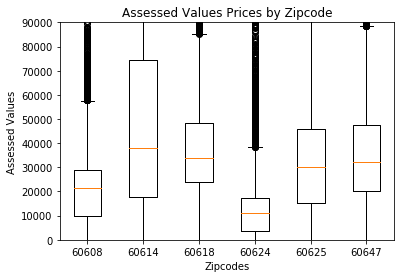

In [173]:
data = [df_60608_final, df_60614_final, df_60618_final, df_60624_final, df_60625_final, df_60647_final]
zipcodes = ["60608", "60614", "60618", "60624", "60625", "60647"]
figl, axl = plt.subplots()
axl.set_title("Assessed Values Prices by Zipcode")
axl.set_ylabel("Assessed Values")
axl.set_xlabel("Zipcodes")
ymin = 0
ymax = 90000
plt.ylim(ymin, ymax)
axl.boxplot(data, labels=zipcodes)
plt.show()